In [1]:
import matplotlib
import matplotlib.pylab as plt
from matplotlib.dates import date2num, DateFormatter,\
    MonthLocator, WeekdayLocator, DayLocator, MinuteLocator, MONDAY
from matplotlib.finance import candlestick_ohlc
import numpy as np
import pandas as pd

In [2]:
frame = pd.DataFrame.from_csv('/tmp/bitstampUSD.out.csv')
frame.set_index(pd.to_datetime(frame.index, unit='s'), inplace=True)
frame.index.name = 'date'
frame['time'] = date2num(frame.index.to_pydatetime())
frame[:5]

,open,high,low,close,order1_type,order1_side,order1_price,order2_type,order2_side,order2_price,transaction_fee,accumulated_fee,security_balance,cash_balance,value,time
date,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,430.89,431.06,430.19,431.06,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1.0,0.0,431.06,735964.000000
2016-01-01 00:05:00,431.06,432.53,430.21,432.51,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1.0,0.0,432.51,735964.003472
2016-01-01 00:10:00,432.38,432.38,431.46,431.46,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1.0,0.0,431.46,735964.006944
2016-01-01 00:15:00,432.38,432.58,431.47,431.47,LIMIT,SELL,435.75,NaN,NaN,NaN,0,0,1.0,0.0,431.47,735964.010417
2016-01-01 00:20:00,431.58,432.40,431.46,431.46,LIMIT,SELL,435.76,NaN,NaN,NaN,0,0,1.0,0.0,431.46,735964.013889


In [3]:
next_order_frame = frame[['order1_side']].shift(-1).copy()
next_order_frame.columns = ['order1_side_next']
next_frame = frame.join(next_order_frame)
next_frame[:5]

,open,high,low,close,order1_type,order1_side,order1_price,order2_type,order2_side,order2_price,transaction_fee,accumulated_fee,security_balance,cash_balance,value,time,order1_side_next
date,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,430.89,431.06,430.19,431.06,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1.0,0.0,431.06,735964.000000,NaN
2016-01-01 00:05:00,431.06,432.53,430.21,432.51,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1.0,0.0,432.51,735964.003472,NaN
2016-01-01 00:10:00,432.38,432.38,431.46,431.46,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1.0,0.0,431.46,735964.006944,SELL
2016-01-01 00:15:00,432.38,432.58,431.47,431.47,LIMIT,SELL,435.75,NaN,NaN,NaN,0,0,1.0,0.0,431.47,735964.010417,SELL
2016-01-01 00:20:00,431.58,432.40,431.46,431.46,LIMIT,SELL,435.76,NaN,NaN,NaN,0,0,1.0,0.0,431.46,735964.013889,SELL


In [6]:
next_frame[next_frame['order1_side'] != next_frame['order1_side_next']][[
    'order1_type', 'order1_side']][:10]

,order1_type,order1_side
date,,
2016-01-01 00:00:00,NaN,NaN
2016-01-01 00:05:00,NaN,NaN
2016-01-01 00:10:00,NaN,NaN
2016-01-07 02:35:00,LIMIT,SELL
2016-01-07 07:50:00,LIMIT,BUY
2016-01-15 13:55:00,LIMIT,SELL
2016-01-15 14:20:00,LIMIT,BUY
2016-01-15 18:15:00,LIMIT,SELL
2016-01-15 19:35:00,LIMIT,BUY


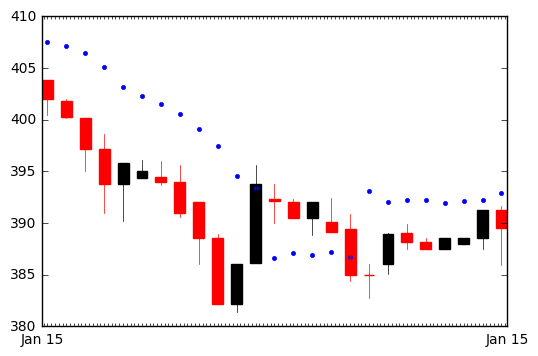

In [7]:
subframe = frame['2016-01-15 13:00':'2016-01-15 15:00']

fig, ax = plt.subplots()
ax.xaxis.set_major_locator(WeekdayLocator(MONDAY))
ax.xaxis.set_minor_locator(MinuteLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))

ax.plot(subframe['time'].values, subframe['order1_price'].values, color='blue', linestyle='', marker='.')
candlestick_ohlc(ax, subframe[['time', 'open', 'high', 'low', 'close']].values, width=0.002)

ax.xaxis_date()
ax.autoscale_view()

plt.show()

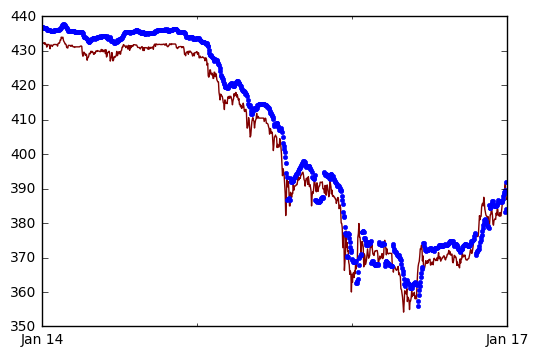

In [8]:
subframe = frame['2016-01-14':'2016-01-16']

fig, ax = plt.subplots()
ax.plot(subframe['time'], subframe['close'].values, color='maroon')
ax.plot(subframe['time'], subframe['order1_price'].values, linestyle='', marker='.', color='blue')
ax.xaxis.set_major_locator(WeekdayLocator(MONDAY))
ax.xaxis.set_minor_locator(DayLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))

plt.show()